# **Data Analysis - Laptops Prices Dataset**
In the forthcoming notebook, I am eager to apply the concepts gleaned from the IBM course, "Data Analysis with Python."

In [ ]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [ ]:

url_git_csv = 'https://raw.githubusercontent.com/Hamza97d/DataAnalysisPython/79a3470261cbe6771b15c9bb92fd44ccb746a874/Exploratory_Data_Analysis_1/laptops.csv'
df = pd.read_csv(url_git_csv)

df.head(10)

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0
5,5,5,Dell,3,1,1,5,15.6,0.551724,8,256,4.85100,1016,Low,1,0
6,6,6,HP,3,3,1,5,15.6,0.551724,8,256,4.63050,1117,Low,1,0
7,7,7,Acer,3,2,1,5,15.0,0.551724,4,256,4.85100,866,Low,0,1
8,8,8,Dell,3,1,1,5,15.6,0.862069,4,256,5.07150,812,Low,1,0
9,9,9,Acer,3,3,1,7,15.0,0.620690,8,256,4.85100,1068,Low,0,1


# Continuous valued features

Generate regression plots for each of the parameters "CPU_frequency", "Screen_Size_inch" and "Weight_pounds" against "Price". Also, print the value of correlation of each feature with "Price".

(0.0, 3974.15)

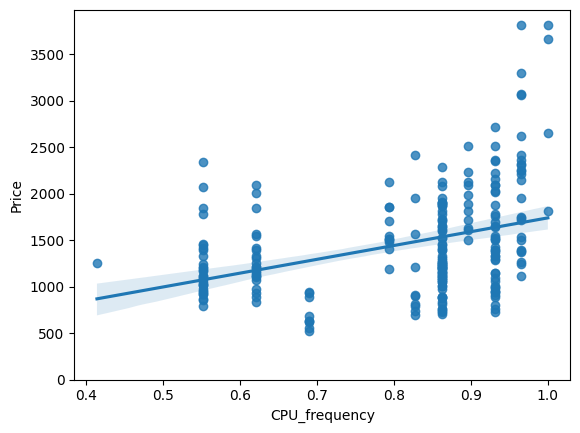

In [ ]:
sns.regplot(x= "CPU_frequency", y= "Price", data= df)
plt.ylim(0,)

(0.0, 3974.15)

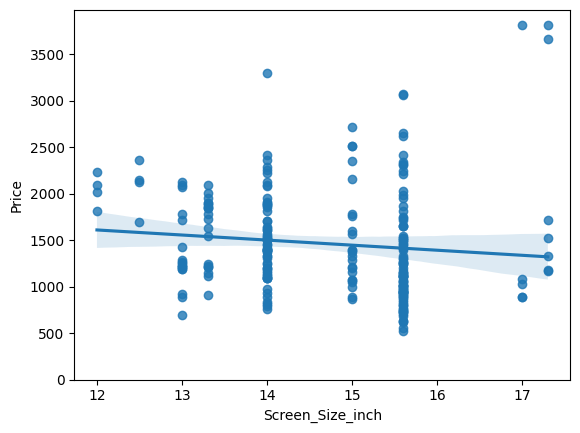

In [ ]:
sns.regplot(x="Screen_Size_inch", y="Price", data=df)
plt.ylim(0,)

(0.0, 3974.15)

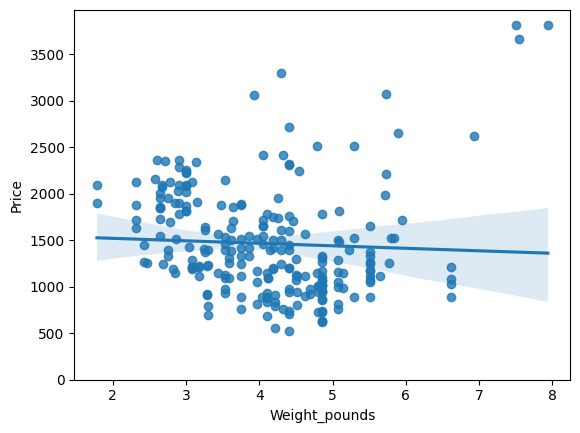

In [ ]:
sns.regplot(x="Weight_pounds", y= "Price", data=df)
plt.ylim(0,)

In [ ]:
# Correlation values of the three attributes with Price
attributes= df[["Weight_pounds", "Screen_Size_inch", "CPU_frequency"]]

for x in attributes:
    print("Correlation of", x,":")
    print(df[[x,"Price"]].corr())
    print("")

Correlation of Weight_pounds :
               Weight_pounds     Price
Weight_pounds       1.000000 -0.050312
Price              -0.050312  1.000000

Correlation of Screen_Size_inch :
                  Screen_Size_inch     Price
Screen_Size_inch          1.000000 -0.110644
Price                    -0.110644  1.000000

Correlation of CPU_frequency :
               CPU_frequency     Price
CPU_frequency       1.000000  0.366666
Price               0.366666  1.000000



Interpretation: "CPU_frequency" has a 36% positive correlation with the price of the laptops. The other two parameters have weak correlation with price.

# Categorical features
Box plots for features "Category", "GPU", "OS", "CPU_core", "RAM_GB", "Storage_GB_SSD"

<Axes: xlabel='Category', ylabel='Price'>

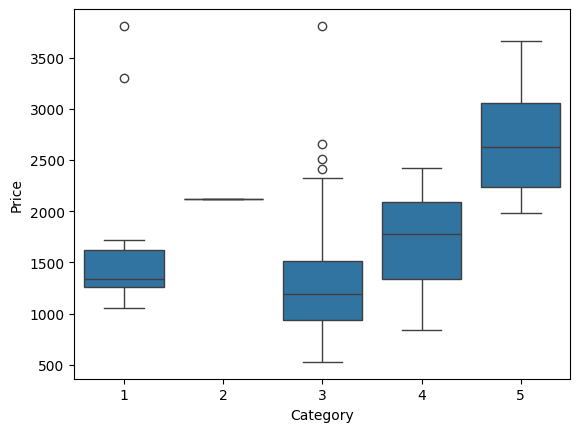

In [ ]:
sns.boxplot(x= "Category", y= "Price", data= df)



<Axes: xlabel='GPU', ylabel='Price'>

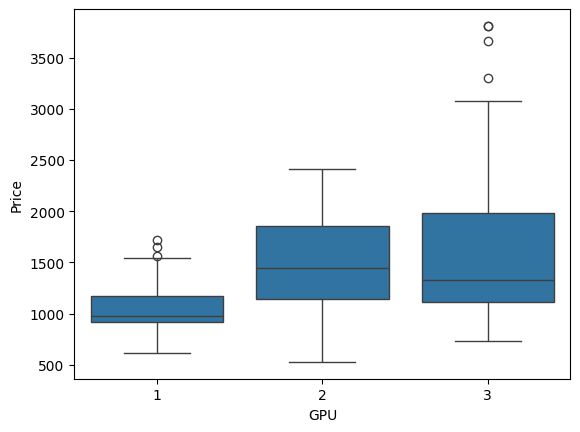

In [ ]:
sns.boxplot(x= "GPU", y= "Price", data= df)


<Axes: xlabel='OS', ylabel='Price'>

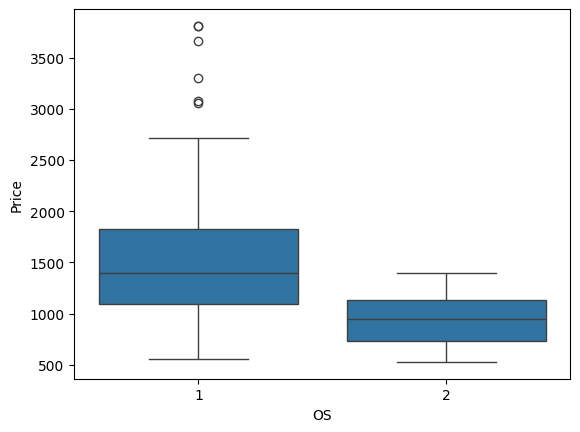

In [ ]:
sns.boxplot(x= "OS", y= "Price", data= df)


<Axes: xlabel='CPU_core', ylabel='Price'>

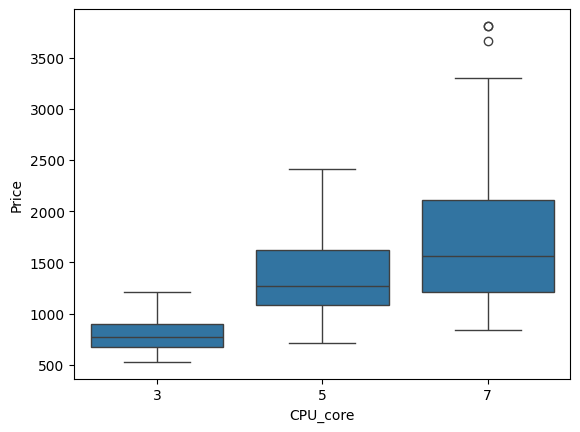

In [ ]:
sns.boxplot(x= "CPU_core", y= "Price", data= df)


<Axes: xlabel='RAM_GB', ylabel='Price'>

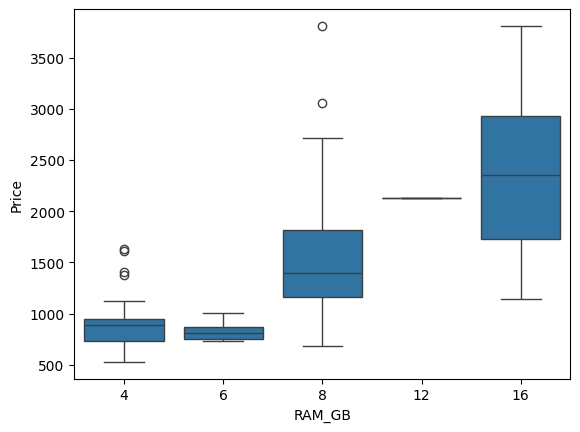

In [ ]:
sns.boxplot(x= "RAM_GB", y= "Price", data= df)


<Axes: xlabel='Storage_GB_SSD', ylabel='Price'>

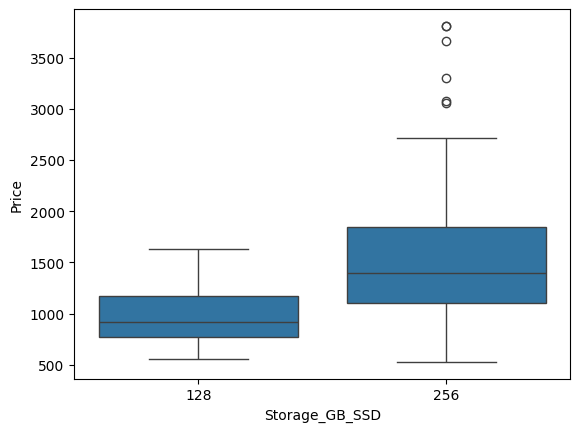

In [ ]:
sns.boxplot(x= "Storage_GB_SSD", y= "Price", data= df)

# Descriptive Statistical Analysis
Statistical description of all the features being used in the data set.


In [ ]:
print(df.describe())
print(df.describe(include=['object']))

       Unnamed: 0.1  Unnamed: 0    Category         GPU          OS  \
count    238.000000  238.000000  238.000000  238.000000  238.000000   
mean     118.500000  118.500000    3.205882    2.151261    1.058824   
std       68.848868   68.848868    0.776533    0.638282    0.235790   
min        0.000000    0.000000    1.000000    1.000000    1.000000   
25%       59.250000   59.250000    3.000000    2.000000    1.000000   
50%      118.500000  118.500000    3.000000    2.000000    1.000000   
75%      177.750000  177.750000    4.000000    3.000000    1.000000   
max      237.000000  237.000000    5.000000    3.000000    2.000000   

         CPU_core  Screen_Size_inch  CPU_frequency      RAM_GB  \
count  238.000000        238.000000     238.000000  238.000000   
mean     5.630252         14.688655       0.813822    7.882353   
std      1.241787          1.166045       0.141860    2.482603   
min      3.000000         12.000000       0.413793    4.000000   
25%      5.000000         14.0

# GroupBy and Pivot Tables
Group the parameters "GPU", "CPU_core" and "Price" to make a pivot table and visualize this connection using the pcolor plot.

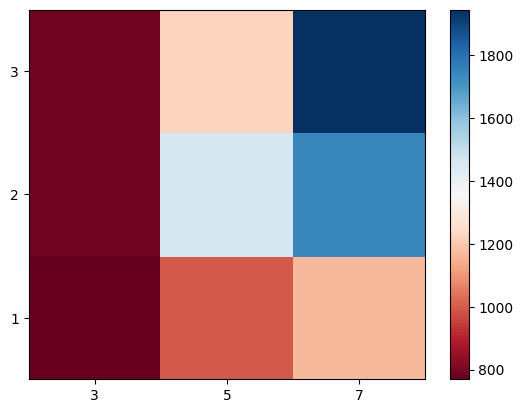

In [ ]:
df_GPU_CPU= df[["GPU","CPU_core","Price"]]
group= df_GPU_CPU.groupby(["GPU","CPU_core"], as_index= False).mean()

# Pivot table
group_pivot= group.pivot(index="GPU", columns="CPU_core")


# Plot
fig, ax = plt.subplots()
im = ax.pcolor(group_pivot, cmap='RdBu')

#label names
row_labels = group_pivot.columns.levels[1]
col_labels = group_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(group_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(group_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

fig.colorbar(im)

# Pearson Correlation and p-values
evaluation of the Pearson Coefficient and the p-values for the parameter. This will help me determine the parameters most likely to have a strong effect on the price of the laptops.

In [ ]:
cor_price= df[[ "GPU", "OS", "CPU_core", "CPU_frequency","RAM_GB"]]
for x in cor_price.columns:
    pearson_coef, p_value= stats.pearsonr(df[x],df["Price"])
    print("Parameter tested", x)
    print("The pearson coefficent is ",pearson_coef, "While the P-value is",p_value)
    print("the p-value is less then 0.001:", p_value< 0.001)
    print("")

Parameter tested GPU
The pearson coefficent is  0.2882981988881428 While the P-value is 6.166949698364282e-06
the p-value is less then 0.001: True

Parameter tested OS
The pearson coefficent is  -0.22172980114827384 While the P-value is 0.0005696642559246749
the p-value is less then 0.001: True

Parameter tested CPU_core
The pearson coefficent is  0.4593977773355115 While the P-value is 7.912950127009034e-14
the p-value is less then 0.001: True

Parameter tested CPU_frequency
The pearson coefficent is  0.36666555892588604 While the P-value is 5.5024633507134225e-09
the p-value is less then 0.001: True

Parameter tested RAM_GB
The pearson coefficent is  0.5492972971857844 While the P-value is 3.681560628842868e-20
the p-value is less then 0.001: True



# **In conclusion**,

All the parameters tested in relation to the price exhibit statistical significance, with p-values less than 0.001. However, there are variations in the relationships observed. Specifically, CPU_core and RAM_GB demonstrate a moderate positive relationship with price, while CPU_frequency and GPU exhibit a low positive relationship. Conversely, the operating system (OS) shows a low negative relationship with price."




**Reference**

IBM. Data Analysis with Python. https://www.coursera.org/professional-certificates/ibm-data-science